In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler 
sns.set(style = 'whitegrid')

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('data.csv')
data.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


So basically according to the problem statement, will the user buy an insurance AGAIN based on this data.

- id: Unique ID for the customer
- Gender: Gender of the customer
- Age: Age of the customer
- Driving_License: [0 : Customer does not have DL, 1 : Customer already has DL]
- Region_Code: Unique code for the region of the customer
- Previously_Insured: [1 : Customer already has Vehicle Insurance, 0 : Customer doesn't have Vehicle Insurance]
- Vehicle_Age: Age of the Vehicle
- Vehicle_Damage: [1 : Customer got his/her vehicle damaged in the past. 0 : Customer didn't get his/her vehicle damaged in the past.]
- Annual_Premium: The amount customer needs to pay as premium in the year
- Policy_Sales_Channel: From which channel did the customer buy the insurance ie. Different Agents, Over Mail, Over Phone, In Person, etc.
- Vintage: Number of Days, Customer has been associated with the company
- Response: [1 : Customer is interested, 0 : Customer is not interested]

## EDA

In [3]:
data.shape

(381109, 12)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [5]:
data.duplicated().sum()

np.int64(0)

In [6]:
data.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [7]:
data['Response'].value_counts()

Response
0    334399
1     46710
Name: count, dtype: int64

About 10% of the people are interested in buying the insurance rest 90% are not

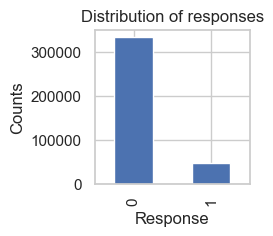

In [8]:
#plotting the value counts
value_counts = data['Response'].value_counts()

plt.figure(figsize=(2, 2))

#bar plot
value_counts.plot(kind = 'bar')

plt.xlabel('Response')
plt.ylabel('Counts')
plt.title('Distribution of responses')

plt.show()

## Plotting to derive some more insights on the data

<Axes: >

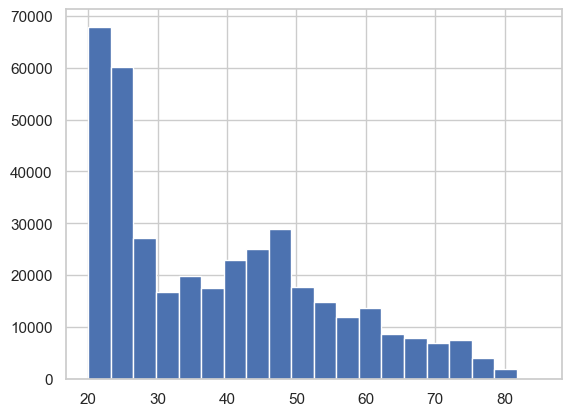

In [9]:
#distribution of age
data['Age'].hist(bins = 20)

About 50% of the data are people in the range of 20-30 years

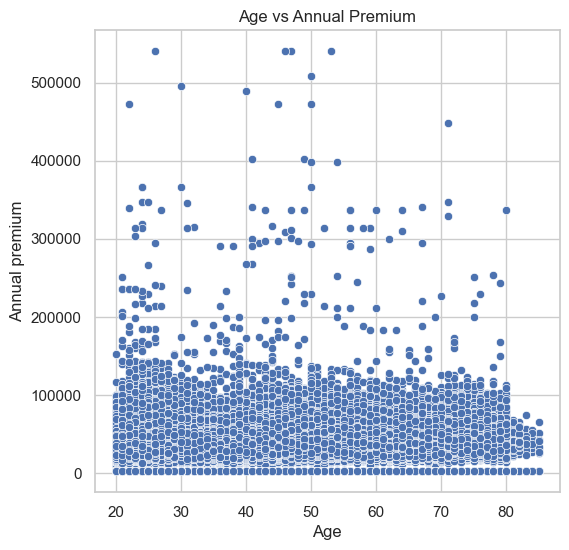

In [10]:
#scatter plot
plt.figure(figsize=(6, 6))
sns.scatterplot(x = data['Age'], y = data['Annual_Premium'], data = data)

plt.title('Age vs Annual Premium')
plt.xlabel('Age')
plt.ylabel('Annual premium')

plt.show()

In [11]:
data['Gender'].value_counts()

Gender
Male      206089
Female    175020
Name: count, dtype: int64

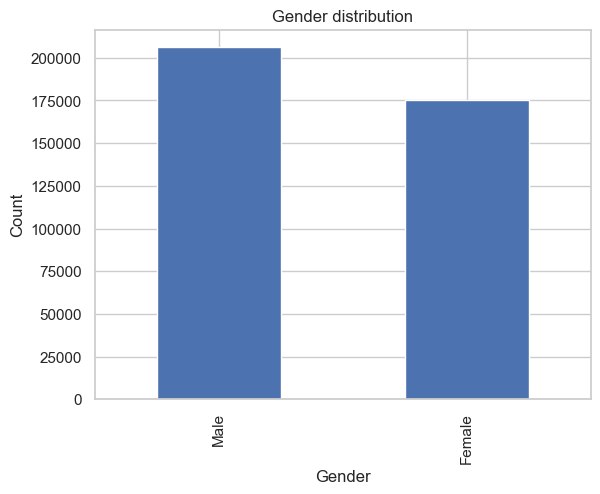

In [12]:
#distribution of gender
value_counts = data['Gender'].value_counts()
value_counts.plot(kind = 'bar')

plt.title('Gender distribution')
plt.xlabel('Gender')
plt.ylabel('Count')

plt.show()

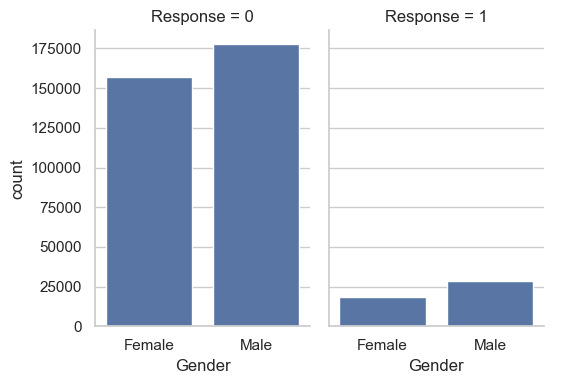

In [13]:
df = data.groupby(['Gender', 'Response'])['id'].count().to_frame().rename(columns = {'id': 'count'}).reset_index()

g = sns.catplot(x = 'Gender', y = 'count', col = 'Response', data = df, kind = 'bar', height=4, aspect=.7);

In [14]:
data.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


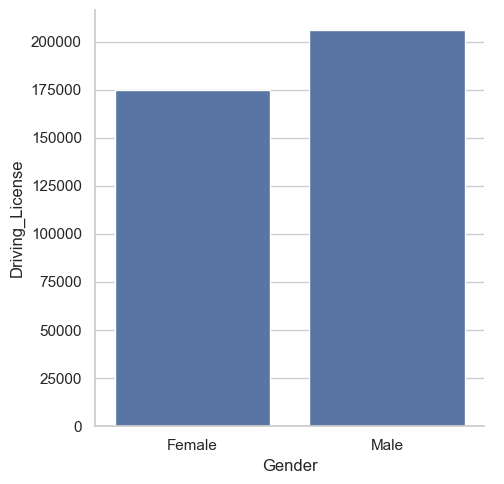

In [15]:
#driving license by gender

df = data.groupby(['Gender'])['Driving_License'].count().to_frame().reset_index()  #using reset_index because yahaape Gender is acting like an index and not column, so it will throw error 
sns.catplot(x = 'Gender', y = 'Driving_License', data= df, kind = 'bar')

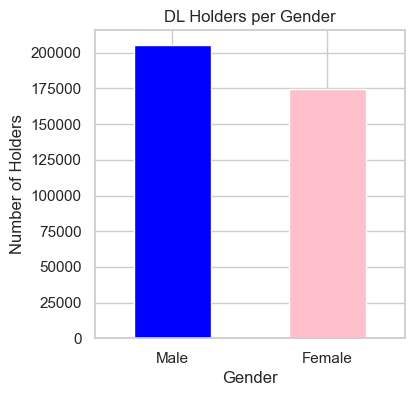

In [16]:
#lets further filter down into extracting those people who have driving license
license_holders = data[data['Driving_License'] == 1]     #data[boolean_masking]--> Basically license_holder is a data frame jahaape DL column meh saare values 1 hai

#groupby gender and count the number of license holder per gender
gender_counts = license_holders['Gender'].value_counts()   #license holder which is a dataframe usme se gender column ka value counts


plt.figure(figsize = (4, 4))
gender_counts.plot(kind = 'bar', color=['blue', 'pink'])
plt.xlabel('Gender')
plt.ylabel('Number of Holders')
plt.title("DL Holders per Gender")
plt.xticks(rotation = 0)  #ye daalne pe jo x labels h vo horizontally likhe ja rahe h, varna vertically likhe huye the
plt.show()

Technically we have filtered out people WITHOUT driving license, so isiliye the above code works perfectly

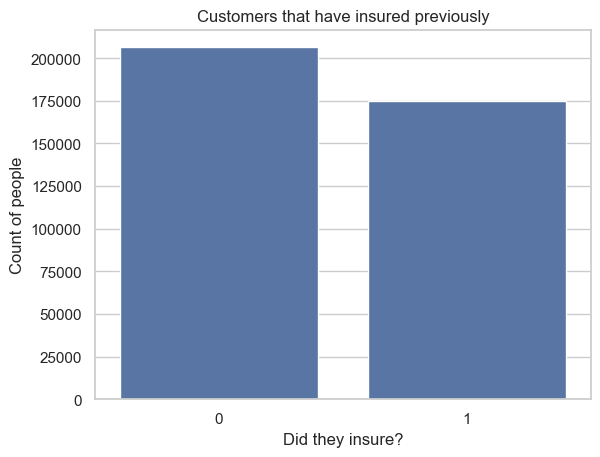

In [17]:
#customers with existing insurance
sns.countplot(x = 'Previously_Insured', data = data)
plt.title('Customers that have insured previously')
plt.xlabel('Did they insure?')
plt.ylabel('Count of people')
plt.show()

Most people have not insured previously

In [18]:
data.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [19]:
data['Vehicle_Age'].value_counts()

Vehicle_Age
1-2 Year     200316
< 1 Year     164786
> 2 Years     16007
Name: count, dtype: int64

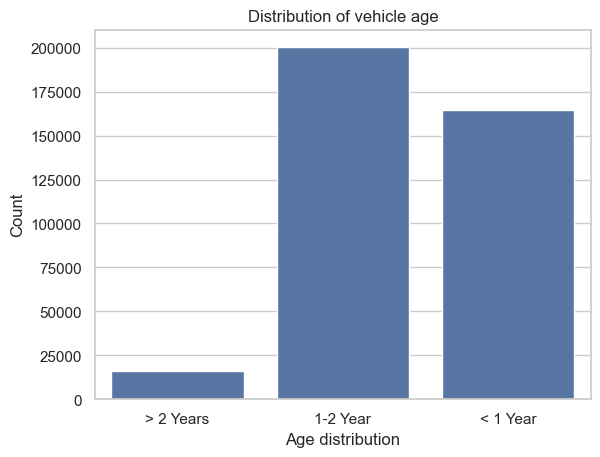

In [20]:
#vehicle age distribution
sns.countplot(x = 'Vehicle_Age', data = data)
plt.title('Distribution of vehicle age')
plt.xlabel('Age distribution')
plt.ylabel('Count')
plt.show()

Greater than 2 years of owning the car vale bohot kam hi hai

Most people have cars that is bought recently in the age of 1-2 years

In [21]:
df = data.groupby(['Response', 'Vehicle_Age'])['id'].count().to_frame().rename(columns={'id': 'count'}).reset_index()
df

,Response,Vehicle_Age,count
0,0,1-2 Year,165510
1,0,< 1 Year,157584
2,0,> 2 Years,11305
3,1,1-2 Year,34806
4,1,< 1 Year,7202
5,1,> 2 Years,4702


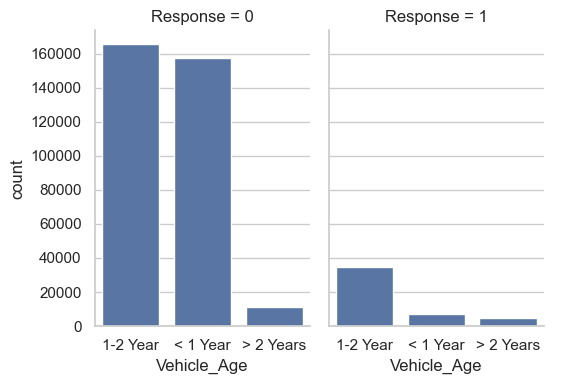

In [22]:
g = sns.catplot(x = 'Vehicle_Age', y = 'count', col='Response', data = df, kind = 'bar', height = 4, aspect = .7)

In [23]:
data.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


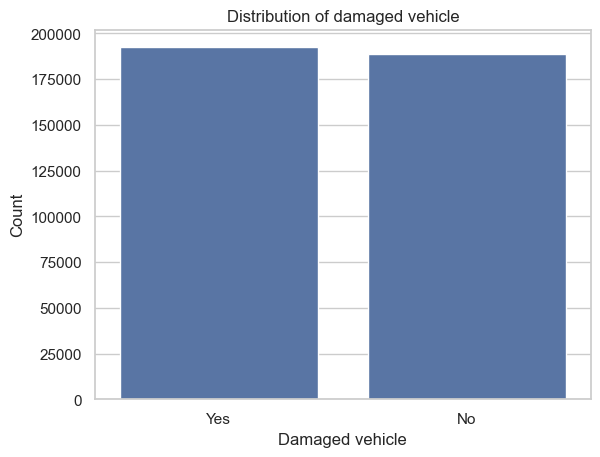

In [24]:
#distribution for vehicle damage
sns.countplot(x = 'Vehicle_Damage', data = data)
plt.title('Distribution of damaged vehicle')
plt.xlabel('Damaged vehicle')
plt.ylabel('Count')
plt.show()

In [25]:
#jo responses aaye h, uss basis pe kitne aise h jinka vehicle damaged the ya nahi
df = data.groupby(['Response', 'Vehicle_Damage'])['id'].count().to_frame().rename(columns = {'id': 'count'}).reset_index()
df

,Response,Vehicle_Damage,count
0,0,No,187714
1,0,Yes,146685
2,1,No,982
3,1,Yes,45728


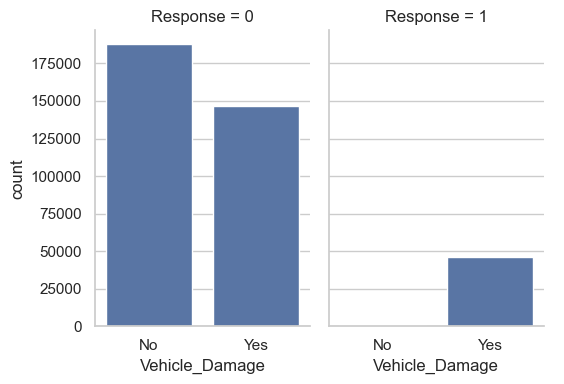

In [26]:
g = sns.catplot(x = 'Vehicle_Damage', data = df, col='Response', height = 4, aspect = .7, kind = 'bar', y = 'count')

In [27]:
#checking stats for annual premium
data['Annual_Premium'].describe()

count    381109.000000
mean      30564.389581
std       17213.155057
min        2630.000000
25%       24405.000000
50%       31669.000000
75%       39400.000000
max      540165.000000
Name: Annual_Premium, dtype: float64

<Axes: >

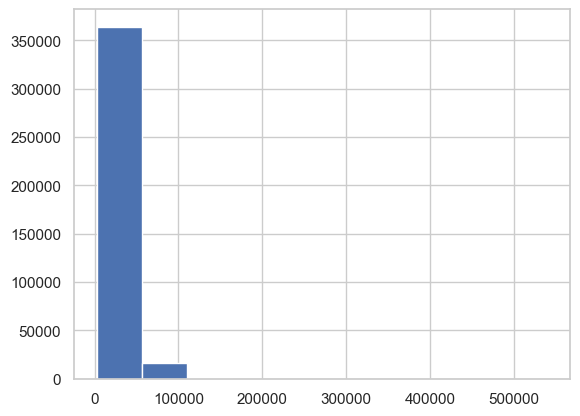

In [28]:
data['Annual_Premium'].hist(bins = 10)

In [29]:
data[data['Annual_Premium'] > 200000]

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
1412,1413,Female,41,1,28.0,0,1-2 Year,Yes,267698.0,124.0,63,1
11319,11320,Female,50,1,46.0,1,1-2 Year,No,508073.0,26.0,192,0
13426,13427,Female,47,1,28.0,0,1-2 Year,Yes,301762.0,124.0,22,0
15024,15025,Female,32,1,28.0,0,1-2 Year,Yes,315565.0,155.0,150,0
25532,25533,Male,50,1,28.0,0,1-2 Year,Yes,229935.0,122.0,64,1
...,...,...,...,...,...,...,...,...,...,...,...,...
368263,368264,Female,25,1,28.0,1,< 1 Year,Yes,346982.0,124.0,74,0
371910,371911,Female,23,1,37.0,1,< 1 Year,No,235683.0,152.0,246,0
372492,372493,Male,46,1,18.0,0,1-2 Year,No,220581.0,26.0,210,0
373415,373416,Male,56,1,28.0,0,1-2 Year,No,337573.0,26.0,239,0


## Data Preprocessing

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


Dividing into Numerical and Categorical Features

In [31]:
num_feat = ['Age', 'Vintage']
cat_feat = ['Gender', 'Driving_License', 'Previously_Insured', 'Vehicle_Age_lt_1_Year', 'Vehicle_Age_gt_2_Years', 'Vehicle_Damage_Yes', 'Region_Code', 'Policy_Sales_Channel']

In [32]:
#mapping gender to 0 and 1 values
data['Gender'] = data['Gender'].map({'Female': 0, 'Male': 1}).astype(int)
data.head(5)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,1,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,1,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,1,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,1,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,0,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [33]:
for col in data.columns:
    print(f"{col} --> {data[col].dtype}")

id --> int64
Gender --> int64
Age --> int64
Driving_License --> int64
Region_Code --> float64
Previously_Insured --> int64
Vehicle_Age --> object
Vehicle_Damage --> object
Annual_Premium --> float64
Policy_Sales_Channel --> float64
Vintage --> int64
Response --> int64


In [34]:
#creating dummy column for categorical features

data = pd.get_dummies(data, drop_first = True)
data.head(5)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Vehicle_Damage_Yes
0,1,1,44,1,28.0,0,40454.0,26.0,217,1,False,True,True
1,2,1,76,1,3.0,0,33536.0,26.0,183,0,False,False,False
2,3,1,47,1,28.0,0,38294.0,26.0,27,1,False,True,True
3,4,1,21,1,11.0,1,28619.0,152.0,203,0,True,False,False
4,5,0,29,1,41.0,1,27496.0,152.0,39,0,True,False,False


get_dummies converts binary columns into one-hot encoded labels

Drop first isiliye zaruri h qki for example Male aur Female dono hai

toh ye kya krta h ek column Male ka banadega 1 0 1 0 1 0

Dusra column female ka bandega 0 1 0 1 0 1 0

End of the day, matlab vahi rehta h toh koi point nahi h

In [35]:
for col in data.columns:
    print(f"{col} --> {data[col].dtype}")

id --> int64
Gender --> int64
Age --> int64
Driving_License --> int64
Region_Code --> float64
Previously_Insured --> int64
Annual_Premium --> float64
Policy_Sales_Channel --> float64
Vintage --> int64
Response --> int64
Vehicle_Age_< 1 Year --> bool
Vehicle_Age_> 2 Years --> bool
Vehicle_Damage_Yes --> bool


In [36]:
#renaming columns and keeping dtype as int 

data = data.rename(columns = {"Vehicle_Age_< 1 Year": "Vehicle_Age_lt_1_Year", "Vehicle_Age_> 2 Years" : "Vehicle_Age_gt_2_Years"})
data['Vehicle_Age_lt_1_Year'] = data['Vehicle_Age_lt_1_Year'].astype('int')
data['Vehicle_Age_gt_2_Years'] = data['Vehicle_Age_gt_2_Years'].astype('int')
data['Vehicle_Damage_Yes'] = data['Vehicle_Damage_Yes'].astype('int')

In [37]:
#scaling the data 

from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler, RobustScaler

ss = StandardScaler()
data[num_feat] = ss.fit_transform(data[num_feat])

mm = MinMaxScaler()
data[['Annual_Premium']] = mm.fit_transform(data[['Annual_Premium']])

#also dropping id col now
id = data.id
data = data.drop('id', axis = 1)

In [38]:
#train test split

from sklearn.model_selection import train_test_split

X = data.drop(['Response'], axis = 1)
Y = data['Response']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [39]:
Y

0         1
1         0
2         1
3         0
4         0
         ..
381104    0
381105    0
381106    0
381107    0
381108    0
Name: Response, Length: 381109, dtype: int64

In [40]:
X.head(3)

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Vehicle_Age_lt_1_Year,Vehicle_Age_gt_2_Years,Vehicle_Damage_Yes
0,1,0.333777,1,28.0,0,0.070366,26.0,0.748795,0,1,1
1,1,2.396751,1,3.0,0,0.057496,26.0,0.342443,0,0,0
2,1,0.527181,1,28.0,0,0.066347,26.0,-1.521998,0,1,1


## Model Trainer - Random Forest Classifier

In [41]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import RandomizedSearchCV

params = {'criterion': ['entropy', 'gini'],
               'max_depth': [2,3,4,5,6,7,10],
               'min_samples_leaf': [4, 6, 8],
               'min_samples_split': [5, 7,10],
               'n_estimators': [300]}

clf = RandomForestClassifier()
model = RandomizedSearchCV(clf, params, cv = 4, n_iter = 10, verbose = 1, random_state = 101, n_jobs = -1)
model.fit(X_train, Y_train)

Fitting 4 folds for each of 10 candidates, totalling 40 fits


,estimator,RandomForestClassifier()
,param_distributions,"{'criterion': ['entropy', 'gini'], 'max_depth': [2, 3, ...], 'min_samples_leaf': [4, 6, ...], 'min_samples_split': [5, 7, ...], ...}"
,n_iter,10
,scoring,None
,n_jobs,-1
,refit,True
,cv,4
,verbose,1
,pre_dispatch,'2*n_jobs'
,random_state,101
,error_score,nan


In [42]:
import pickle 

filename = 'rf_model.pkl'
pickle.dump(model, open(filename, 'wb'))

In [43]:
#loading the pickle file 

rf_load = pickle.load(open(filename, 'rb'))

## Model Evaluation

In [44]:
from sklearn.metrics import classification_report

y_pred = model.predict(X_test)
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      1.00      0.93     66846
           1       0.00      0.00      0.00      9376

    accuracy                           0.88     76222
   macro avg       0.44      0.50      0.47     76222
weighted avg       0.77      0.88      0.82     76222

